## 사운드 모델


##### [사운드 모델 colab 코드 (colab환경에 최적화되어있습니다.)](https://colab.research.google.com/drive/148TWYh9YqvqyowSTJH41BRmm7HOj2M1L?usp=sharing)
##### [사운드모델 파일](https://drive.google.com/file/d/1ku4zgyhK2NLqiuWTzswNO1PLcSKGVRe5/view?usp=sharing)
#### 사운드 모델 성능
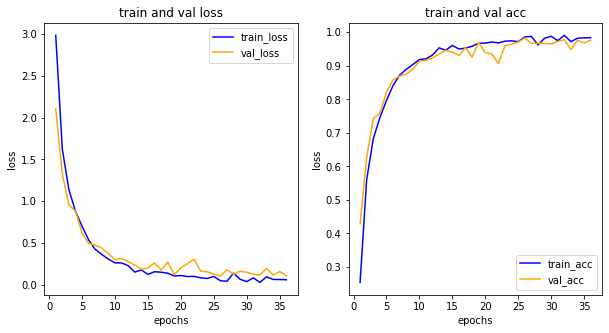

## 이미지 모델


##### [이미지 모델 colab 코드 (colab환경에 최적화되어있습니다.)](https://colab.research.google.com/drive/1ih9ztV8HCo8c-oLVTgacem4PE5-uupa-?usp=sharing)
##### [이미지 모델 파일](https://drive.google.com/file/d/1h-mCkVrOyKAd-VVfyBDhbm6yxMXfp-Sg/view?usp=share_link)
#### 이미지 모델( GoogLeNet ) 성능
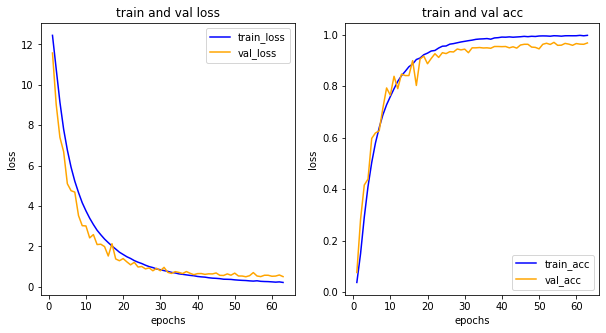

## 매칭 알고리즘


### 매칭 대상 드라이브 경로


In [ ]:
import pandas as pd
from keras.models import load_model
import numpy as np
import tensorflow as tf
import librosa
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/테스트 소스/'

# 구글 드라이브 파일 확인
!ls drive_path
match_path = '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋'

Mounted at /gdrive
ls: cannot access 'drive_path': No such file or directory


### 소스 업로드

In [ ]:
source_path = drive_path + '사운드 소스/고기굽는소리.wav' #파일 경로를 입력해 주십쇼 인터넷에서 받은 사운드
print(source_path)
path_list = source_path.split('/')[-1:]
source_name = str(path_list)[2:-2]
source_type = source_name[-4:]

if source_type == '.png' or source_type == '.PNG' or source_type == '.jpg':
  print('이미지 파일이 입력되었습니다.')
  match_mode = 'img_mode'
  match_folder = match_path + '/사운드/원천데이터/'

elif source_type == '.wav':
  print('wav파일이 입력되었습니다.')
  match_mode = 'snd_mode'
  match_folder = match_path + '/이미지/원천데이터/'

else:
  print("이미지 또는 사운드 wav파일을 넣어주십쇼")

/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/테스트 소스/사운드 소스/고기굽는소리.wav
wav파일이 입력되었습니다.


### 사운드 모드
사운드 입력시

real time = 3.1043083900226756sec
trim time = 3.0650340136054424sec


,FileName,Wav_MFCC
0,고기굽는소리.wav,"[[-557.38873, -46.252106, -6.118139, 13.114464..."


,FileName,Wav_MFCC
0,고기굽는소리.wav,"[[-557.38873, -46.252106, -6.118139, 13.114464..."
0,고기굽는소리.wav,"[[-279.93054, -47.939713, -15.145986, 17.26163..."
0,고기굽는소리.wav,"[[-262.16443, -50.5223, -1.4742705, 26.971676,..."


(3, 100, 100)
1/1 [==============================] - 1s 549ms/step
[35, 5, 61]
싸리비 질
/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질
['/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질/싸리비 질_싸리비_Im10065480.jpg', '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질/싸리비 질_싸리비_Im10058558.jpg', '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질/싸리비 질_싸리비_Im10043746.jpg', '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질/싸리비 질_싸리비_Im10091532.jpg', '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/이미지/원천데이터/싸리비 질/싸리비 질_싸리비_Im10012316.jpg', '/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커

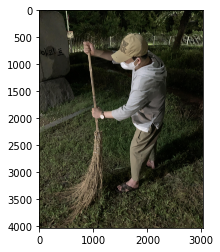

In [ ]:
if match_mode == 'snd_mode':

  import os, sys

  image_path = match_path + ''
  file_name = source_path

  wav_name = []
  wav_mfcc = []

  n_mfcc = 100 # 추출 특징 갯수
  slicing_sec = 100 # 분할 초 단위

  def frequency_sort(data):
    print(data)
    return sorted(data, key=lambda x: (-data.count(x), data.index(x)))

  def trim_silence(samples):
    signals, index = librosa.effects.trim(samples, top_db=30, frame_length=256, hop_length=64)

    return signals

  def extract_feature(file_name):
      X, sample_rate = librosa.load(file_name)
      print(f"real time = {len(X)/sample_rate}sec")
      source = trim_silence(X)
      print(f"trim time = {len(source)/sample_rate}sec")
      mfccs = librosa.feature.mfcc(y=source, sr=sample_rate, n_mfcc=n_mfcc, hop_length=int(sample_rate*0.01), n_fft=int(sample_rate*0.02)).T
      return mfccs

  def sound_to_image_table(num):
    kind_dict = {4: '교회 종', 3: '괘종시계 작동', 2: '골프 치기', 5: '굽기', 1: '경운기 작업', 8: '냉장고 사용', 6: '깎기', 9: '다듬이질',
                 0: '경고음', 7: '끓이기', 13: '대패질', 11: '다지기(채소)', 18: '맷돌 갈기', 16: '떡메질', 19: '먹 갈기', 17: '러닝머신 운동하기',
                 12: '당구 치기', 15: '따르기', 10: '다지기(고기)', 14: '드라이어 사용', 22: '무치기', 20: '면도하기', 21: '면도하기(전동)',
                 23: '물레방아 돌기', 29: '선박 운항', 24: '믹서기 갈기', 26: '분무기 작업', 25: '볼링 치기', 28: '석유풍로 사용', 27: '불 지피기',
                 36: '썰기', 39: '압력밥솥 사용', 31: '세탁기', 35: '싸리비 질', 34: '식당 벨', 37: '안마하기', 33: '스프링클러 동작', 38: '안마하기(전동)',
                 32: '숫돌 갈기', 30: '선풍기 사용', 44: '이발하기', 46: '작두질', 48: '전자레인지 사용', 42: '엿장수', 45: '자전거 타기', 47: '전 부치기',
                 40: '양수기 동작', 49: '절구질', 43: '예초기 작업', 41: '에어컨 사용', 53: '청소하기', 57: '커피콩 갈기', 51: '차량 공회전', 55: '캐리어 사용',
                 58: '커피콩 볶기', 52: '차량 주행', 54: '초인종', 59: '콤바인 작업', 56: '커피 내리기', 50: '주전자 사용', 65: '튀기기', 60: '키보드 치기',
                 69: '화투치기', 63: '탁구 치기', 62: '타자 치기', 67: '프론트 벨', 64: '탄산 따르기', 66: '트랙터 작업', 68: '학교 차임벨', 61: '키질', 71: '횃불 지피기',
                 70: '확독 갈기'}
    return kind_dict[num]

  wav_name.append( source_name )

  mfcc = extract_feature(source_path)
  wav_mfcc.append( mfcc )


  df = pd.DataFrame({'FileName' : wav_name, 'Wav_MFCC' : wav_mfcc }) # df 생성
  display(df)

  sound_model = load_model('/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/모델/사운드 모델/sound_model_100_trim.h5')

  df['Wav_MFCC'] = np.array(df['Wav_MFCC'])

  df_slice = pd.DataFrame(columns=['FileName', 'Wav_MFCC'])

  max = 100
  t = 0
  while df.Wav_MFCC[0].shape[0] / (max*(t+1)) >= 1:
      df_slice = df_slice.append(pd.DataFrame([[df.iloc[0, 0], df.iloc[0, 1][max*t : max*(t+1), :]]], columns=['FileName', 'Wav_MFCC']), ignore_index=False)
      t += 1

  display(df_slice)
  X = np.array(df_slice.Wav_MFCC.tolist())

  n_columns = n_mfcc
  n_row = slicing_sec
  n_channels = 1

  print(X.shape)
  x_test = tf.reshape(X, [-1, n_row, n_columns, n_channels])

  max_loc_y0 = []
  for i in range(x_test.shape[0]):
      y0 = sound_model.predict(np.array(x_test[i]).reshape(-1, slicing_sec, n_mfcc, 1))
      max_loc_y0.append(np.argmax(y0))

  # frequency_sort는 리스트를 원소의 빈도가 많은 순서대로 정렬해주는 함수이다.
  # 따라서, frequency_sort의 첫번째 원소가 가장 많이 투표된 원소이다.

  most_voted = frequency_sort(max_loc_y0)[0]

  # img_sound_tabel은
  predicted_result = sound_to_image_table(most_voted)

  print(predicted_result)

  predicted_path = match_folder +f'{predicted_result}' # kind 폴더들 있는 경로
  print(predicted_path)
  files = glob.glob(predicted_path + "/*")
  print(files)

  image_pil = Image.open(files[0])
  plt.imshow(image_pil)

else :
  print('현재 sound_mode가 아닙니다. wav 파일를 업로드하여 주십시오')

### 이미지 모드
이미지 입력시

In [ ]:
source_path = drive_path + '이미지 소스/굽기_삼겹살.jpg' #파일 경로를 입력해 주십쇼 인터넷에서 받은 사운드
print(source_path)
path_list = source_path.split('/')[-1:]
source_name = str(path_list)[2:-2]
source_type = source_name[-4:]

if source_type == '.png' or source_type == '.PNG' or source_type == '.jpg':
  print('이미지 파일이 입력되었습니다.')
  match_mode = 'img_mode'
  match_folder = match_path + '/사운드/원천데이터/'

elif source_type == '.wav':
  print('wav파일이 입력되었습니다.')
  match_mode = 'snd_mode'
  match_folder = match_path + '/이미지/원천데이터/'

else:
  print("이미지 또는 사운드 wav파일을 넣어주십쇼")

/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/테스트 소스/이미지 소스/굽기_삼겹살.jpg
이미지 파일이 입력되었습니다.


img_tensor------------------=============  (1, 150, 150, 3)
1/1 [==============================] - 1s 671ms/step
pred------------------=============  6
6
/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/사운드/원천데이터/굽기
/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/사운드/원천데이터/굽기/굽기_떡갈비_Sm0000054.wav
mkdir: cannot create directory ‘data’: File exists
굽기_떡갈비_Sm0000054.wav


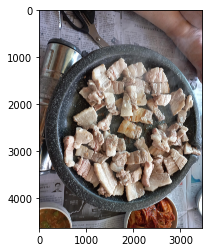

In [ ]:
if match_mode == 'img_mode':
  from keras import utils
  import IPython.display as ipd

  def image_to_sound_table(num):
    kind_dict = {0: '경고음', 1: '괘종시계 작동', 2: '경운기 작업', 3: '골프 치기', 4: '다지기(채소)', 5: '다듬이질', 6: '굽기', 7: '교회 종', 8: '당구 치기',
                 9: '끓이기', 10: '대패질', 11: '다지기(고기)', 12: '냉장고 사용', 13: '깎기', 14: '떡메질', 15: '면도하기(전동)', 16: '먹 갈기', 17: '드라이어 사용',
                 18: '맷돌 갈기', 19: '무치기', 20: '면도하기', 21: '물레방아 돌기', 22: '따르기', 23: '러닝머신 운동하기', 24: '선풍기 사용', 25: '분무기 작업',
                 26: '석유풍로 사용', 27: '불 지피기', 28: '스프링클러 동작', 29: '세탁기', 30: '볼링 치기', 31: '믹서기 갈기', 32: '선박 운항', 33: '숫돌 갈기',
                 34: '싸리비 질', 35: '안마하기(전동)', 36: '양수기 동작', 37: '안마하기', 38: '식당 벨', 39: '썰기', 40: '엿장수', 41: '예초기 작업',
                 42: '압력밥솥 사용', 43: '에어컨 사용', 44: '차량 공회전', 45: '청소하기', 46: '절구질', 47: '작두질', 48: '이발하기', 49: '전 부치기',
                 50: '주전자 사용', 51: '자전거 타기', 52: '차량 주행', 53: '전자레인지 사용', 54: '초인종', 55: '커피콩 갈기', 56: '커피 내리기',
                 57: '콤바인 작업', 58: '키질', 59: '커피콩 볶기', 60: '키보드 치기', 61: '탁구 치기', 62: '타자 치기', 63: '캐리어 사용', 64: '트랙터 작업',
                 65: '확독 갈기', 66: '튀기기', 67: '학교 차임벨', 68: '횃불 지피기', 69: '탄산 따르기', 70: '프론트 벨', 71: '화투치기'}
    return kind_dict[num]

  img = utils.load_img( source_path, target_size=(150, 150) ) #테스트 이미지 경로
  image_pil = Image.open(source_path)
  plt.imshow(image_pil)
  img_tensor = utils.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  print('img_tensor------------------============= ', img_tensor.shape )
  img_tensor/= 255.

  image_model = load_model('/gdrive/MyDrive/프로젝트/이미지 사운드 매칭 공모전/이미지사운드매칭_해커톤_데이터셋/모델/이미지 모델/image_googlenet_SMOTE_224_DataGen.h5')
  pred = image_model.predict(img_tensor)

  print('pred------------------============= ', np.argmax(pred[0]) )


  index = np.argmax(pred[0])
  print(index)

  predicted_result = image_to_sound_table(index)

  predicted_path = match_folder + f'{predicted_result}' # kind 폴더들 있는 경로
  print(predicted_path)
  files = glob.glob(predicted_path + "/*")
  print(files[0])
  file_path = files[0]
else:
  print("현재 sound_mode가 아닙니다. png 파일를 업로드하여 주십시오")


!mkdir data
!cp "$file_path" '/content/data'
file_list = file_path.split('/')[-1:]
file_name = str(file_list)[2:-2]

print(file_name)

sound, sr = librosa.load( '/content/data/' + file_name)
ipd.Audio(sound, rate=sr)